In [1]:
import pandas as pd
import numpy as np
import datetime
from scipy import stats
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
ctrl_max = pd.read_csv('data/ctrl_max.csv')
ctrl_min = pd.read_csv('data/ctrl_min.csv')
rcp_max = pd.read_csv('data/rcp_max.csv')
rcp_min = pd.read_csv('data/rcp_min.csv')
ctrl_pcp = pd.read_csv('data/20c_precip.csv')
rcp_pcp = pd.read_csv('data/rcp_precip.csv')


In [3]:
# filter times
rcp_max = rcp_max[rcp_max.time > '2081-01-01 12:00:00']
rcp_min = rcp_min[rcp_min.time > '2081-01-01 12:00:00']
rcp_pcp = rcp_pcp[rcp_pcp.time > '2081-01-01 12:00:00']
#vals = rcp_pcp.values
#vals = vals * 8640000
#rcp_pcp.values = vals


In [14]:
rcp_max

,member_id,time,lat,lon,TREFHTMX
27376,1,2081-01-02 12:00:00,49.47644,236.25,275.16858
27377,1,2081-01-03 12:00:00,49.47644,236.25,280.75934
27378,1,2081-01-04 12:00:00,49.47644,236.25,277.68463
27379,1,2081-01-05 12:00:00,49.47644,236.25,277.73572
27380,1,2081-01-06 12:00:00,49.47644,236.25,277.79782
...,...,...,...,...,...
1386995,105,2100-12-27 12:00:00,49.47644,236.25,285.86792
1386996,105,2100-12-28 12:00:00,49.47644,236.25,285.28580
1386997,105,2100-12-29 12:00:00,49.47644,236.25,285.49188
1386998,105,2100-12-30 12:00:00,49.47644,236.25,287.23053


In [5]:
def perform_comparison(control_dataset, future_dataset, high, datastring, units):
    
    # bounds for plotting
    max = np.max(future_dataset)
    min = np.min(control_dataset)
    
    # determine threshold 
    if high:
        threshold = control_dataset.quantile(1-1/10/365.25)
    else:
        threshold = control_dataset.quantile(1/10/365.25)
        
    print('threshold is ' + str(threshold))
    
    # plot temperature distribution in control climate
    bins = np.linspace(min, max, 100)
    histogram, bins = np.histogram(control_dataset, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    pdf = stats.norm.pdf(bin_centers)
    plt.figure(figsize=(6, 4))
    plt.plot(bin_centers, histogram, label="Histogram of samples")
    plt.axvline(x = threshold, color = 'r')
    plt.title("PDF of " + datastring + " in Control Climate")
    plt.xlabel(units)
    plt.xlim([min, max])
    #plt.ylim([0, .1])
    plt.show()
    plt.clf()
    
    # mean in historical climate
    control_average = control_dataset.mean()
    print("Average in control dataset: " + str(control_average))
    
    # fraction of time above threshold in control climate
    if high:
        frac_control = len(control_dataset[control_dataset>threshold])/len(control_dataset)
    else:
        frac_control = len(control_dataset[control_dataset<threshold])/len(control_dataset)
    print("Fraction of control with extreme value: " + str(frac_control))
    years = 1/365.25/frac_control
    print("Occurs once every " + str(years) + " years")
    
    # plot temperature distribution in control climate
    bins = np.linspace(min, max, 100)
    histogram, bins = np.histogram(future_dataset, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    pdf = stats.norm.pdf(bin_centers)
    plt.figure(figsize=(6, 4))
    plt.plot(bin_centers, histogram, label="Histogram of samples")
    plt.axvline(x = threshold, color = 'r')
    plt.title("PDF of " + datastring + " in Modelled Future Climate")
    plt.xlabel(units)
    plt.xlim([min, max])
    #plt.ylim([0, .1])
    plt.show()
    plt.clf()
    
    future_average = future_dataset.mean()
    print("Average in future dataset: " + str(future_average))
    
    # fraction of time above threshold in Future climate
    if high:
        frac_future = len(future_dataset[future_dataset>threshold])/len(future_dataset)
    else:
        frac_future = len(future_dataset[future_dataset<threshold])/len(future_dataset)
    print("Fraction of future with extreme value: " + str(frac_future))
    if frac_future != 0:
        years = 1/365.25/frac_future
    else:
        years = "infinity"
    print("Occurs once every " + str(years) + " years")
    
    # what about if the max temp distribution hadn't changed, just shifted?
    shift = future_average - control_average
    print("\n Shift by "+ str(shift))
    
    # just shift temps from control
    control_shifted = control_dataset + shift

    # plot temperature distribution in shifted control
    bins = np.linspace(min, max, 100)
    histogram, bins = np.histogram(control_shifted, bins=bins, density=True)
    bin_centers = 0.5*(bins[1:] + bins[:-1])
    pdf = stats.norm.pdf(bin_centers)
    plt.figure(figsize=(6, 4))
    plt.plot(bin_centers, histogram, label="Histogram of samples")
    plt.axvline(x = threshold, color = 'r')
    plt.title("PDF of " + datastring + " in Shifted Control Climate Climate")
    plt.xlabel(units)
    plt.xlim([min, max])
    #plt.ylim([0, .1])
    plt.show()
    plt.clf()
    
    shifted_average = control_shifted.mean()
    print("Average in shifted dataset: " + str(shifted_average))
    
    # fraction of time above threshold in shifted climate
    if high:
        frac_shift = len(control_shifted[control_shifted>threshold])/len(control_shifted)
    else:
        frac_shift = len(control_shifted[control_shifted<threshold])/len(control_shifted)
    print("Fraction of future with extreme value: " + str(frac_shift))
    years = 1/365.25/frac_shift
    print("Occurs once every " + str(years) + " years")
    
    if frac_future > frac_shift:
        print("\n This Extreme Event is more common in the modelled future climate than shifted control climate")
    else:
        print("\n This Extreme Event is more common in the shifted control climate than the modelled future climate")
        
    # we can plot all the distributions for visual comparison
    plt.figure(figsize=(6, 4))

    histogram1, bins = np.histogram(control_dataset, bins=bins, density=True)
    bin1_centers = 0.5*(bins[1:] + bins[:-1])
    pdf1 = stats.norm.pdf(bin1_centers)
    plt.semilogy(bin1_centers, histogram1, label="Control")

    histogram2, bins = np.histogram(future_dataset, bins=bins, density=True)
    bin2_centers = 0.5*(bins[1:] + bins[:-1])
    pdf2 = stats.norm.pdf(bin2_centers)
    plt.semilogy(bin1_centers, histogram2, label="Future")

    histogram3, bins = np.histogram(control_shifted, bins=bins, density=True)
    bin3_centers = 0.5*(bins[1:] + bins[:-1])
    pdf3 = stats.norm.pdf(bin3_centers)
    plt.semilogy(bin3_centers, histogram3, label="Control Shifted")

    plt.legend()
    plt.axvline(x = threshold, color = 'r')
    plt.xlim([min, max])
    #plt.ylim([0, .1])
    plt.xlabel(units)
    plt.title("PDF of " + datastring + " in Each Modelled Climate")
    plt.show()
    plt.clf()
    
    
    
    #Counts for Chi squared:
    a = len(control_shifted[control_shifted>threshold])
    b = len(control_shifted) - len(control_shifted[control_shifted>threshold])
    c = len(future_dataset[future_dataset>threshold])
    d = len(future_dataset) - len(future_dataset[future_dataset>threshold])
    print("shifted extreme: ", str(a))
    print("shifted non-extreme: ", str(b))

    print("future extreme: ", str(c))
    print("future non-extreme: ", str(d))

    obs = np.array([[a, b], [c, d]])
    res = chi2_contingency(obs)
    print(res.statistic)
    print("p value: " + str(res.pvalue))
    
    if res.pvalue < .05:
        print("This result is statistically significant")
    else:
        print("This result is NOT statistically significant")
    

In [6]:
#Get datasets:

control_months = np.array([int(sub.split('-')[1]) for sub in ctrl_max.time])
future_months =  np.array([int(sub.split('-')[1]) for sub in rcp_max.time])
twc_months = np.array([int(sub.split('-')[1]) for sub in ctrl_pcp.time])

def make_summer(arr):
    ret = []
    for i in range(len(arr)):
        if 6 <= arr[i] <= 8:
            ret.append(True)
        else:
            ret.append(False)
    return ret

def make_winter(arr):
    ret = []
    for i in range(len(arr)):
        if arr[i] == 12 or arr[i] <= 2:
            ret.append(True)
        else:
            ret.append(False)
    return ret

        
control_summer = make_summer(control_months)
control_winter = make_winter(control_months)
future_summer = make_summer(future_months)
future_winter = make_winter(future_months)
twc_summer = make_summer(twc_months)
twc_winter = make_winter(twc_months)

#control_summer
ctrl_max_summer = ctrl_max[control_summer]
ctrl_min_summer = ctrl_min[control_summer]
rcp_max_summer = rcp_max[future_summer]
rcp_min_summer = rcp_min[future_summer]
ctrl_pcp_summer = ctrl_pcp[twc_summer]
rcp_pcp_summer = rcp_pcp[future_summer]

ctrl_max_winter = ctrl_max[control_winter]
ctrl_min_winter = ctrl_min[control_winter]
rcp_max_winter = rcp_max[future_winter]
rcp_min_winter = rcp_min[future_winter]
ctrl_pcp_winter = ctrl_pcp[twc_winter]
rcp_pcp_winter = rcp_pcp[future_winter]


In [7]:
#convert from m/s to mm/day
rcp_pcp_winter.PRECT = rcp_pcp_winter.PRECT * 86400000
ctrl_pcp_winter.PRECT = ctrl_pcp_winter.PRECT * 86400000




C:\Users\miles\AppData\Local\Temp\ipykernel_12440\190267218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcp_pcp_winter.PRECT = rcp_pcp_winter.PRECT * 86400000
C:\Users\miles\AppData\Local\Temp\ipykernel_12440\190267218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_pcp_winter.PRECT = ctrl_pcp_winter.PRECT * 86400000


In [8]:
# convert to C

ctrl_max_summer.TREFHTMX = ctrl_max_summer.TREFHTMX - 273.15
ctrl_min_summer.TREFHTMN = ctrl_min_summer.TREFHTMN - 273.15
rcp_max_summer.TREFHTMX = rcp_max_summer.TREFHTMX - 273.15
rcp_min_summer.TREFHTMN = rcp_min_summer.TREFHTMN - 273.15
ctrl_max_winter.TREFHTMX = ctrl_max_winter.TREFHTMX - 273.15
ctrl_min_winter.TREFHTMN = ctrl_min_winter.TREFHTMN - 273.15
rcp_max_winter.TREFHTMX = rcp_max_winter.TREFHTMX - 273.15
rcp_min_winter.TREFHTMN = rcp_min_winter.TREFHTMN - 273.15

C:\Users\miles\AppData\Local\Temp\ipykernel_12440\584969863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_max_summer.TREFHTMX = ctrl_max_summer.TREFHTMX - 273.15
C:\Users\miles\AppData\Local\Temp\ipykernel_12440\584969863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_min_summer.TREFHTMN = ctrl_min_summer.TREFHTMN - 273.15
C:\Users\miles\AppData\Local\Temp\ipykernel_12440\584969863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

threshold is 39.34930884599493


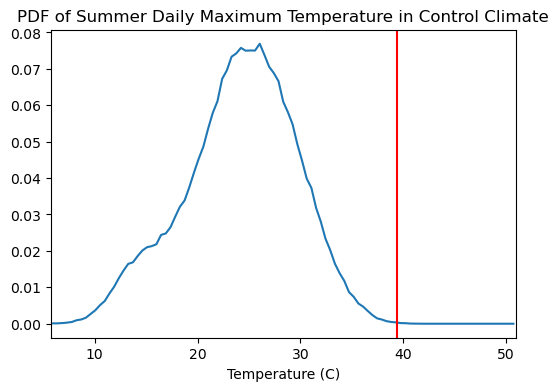

Average in control dataset: 24.153247515105033
Fraction of control with extreme value: 0.00027793218454697053
Occurs once every 9.850787132101301 years


<Figure size 640x480 with 0 Axes>

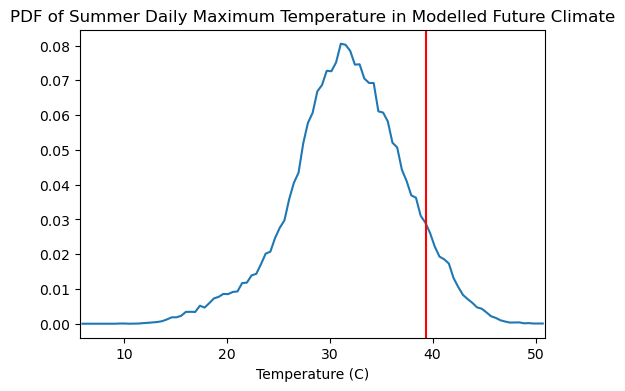

Average in future dataset: 31.75723074714676
Fraction of future with extreme value: 0.08150815217391304
Occurs once every 0.03358990130570473 years

 Shift by 7.6039832320417275


<Figure size 640x480 with 0 Axes>

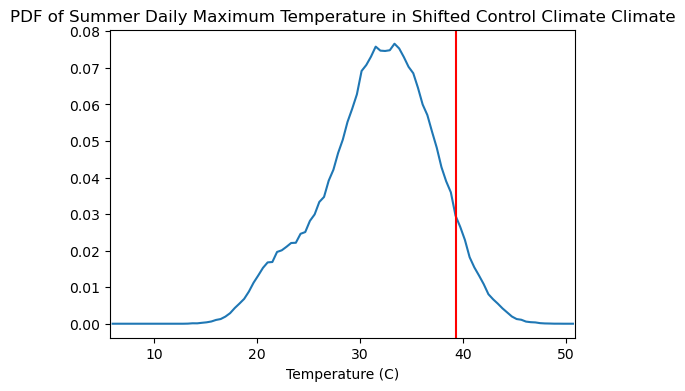

Average in shifted dataset: 31.757230747146767
Fraction of future with extreme value: 0.06904197984387461
Occurs once every 0.03965487075143606 years

 This Extreme Event is more common in the modelled future climate than shifted control climate


<Figure size 640x480 with 0 Axes>

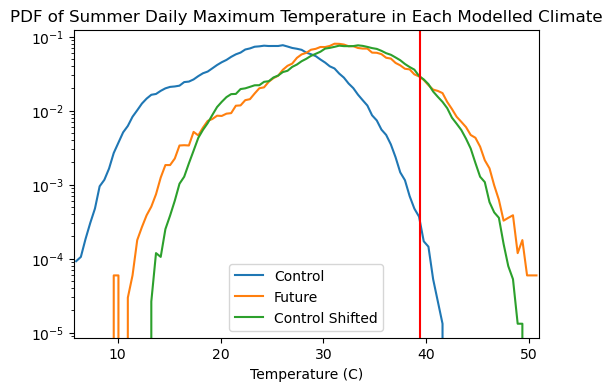

shifted extreme:  11427
shifted non-extreme:  154081
future extreme:  5999
future non-extreme:  67601
116.98897172519686
p value: 2.8866828575007967e-27
This result is statistically significant


<Figure size 640x480 with 0 Axes>

In [9]:
# Extreme High daily maximum temperatures (summer)
perform_comparison(ctrl_max_summer.TREFHTMX, rcp_max_summer.TREFHTMX, True, "Summer Daily Maximum Temperature", "Temperature (C)")

threshold is 16.4501463942504


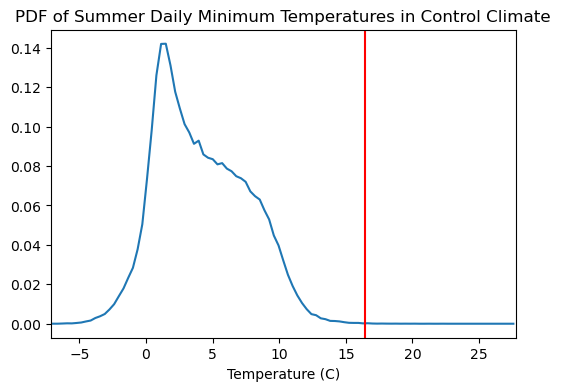

Average in control dataset: 4.179095786789786
Fraction of control with extreme value: 0.00027793218454697053
Occurs once every 9.850787132101301 years


<Figure size 640x480 with 0 Axes>

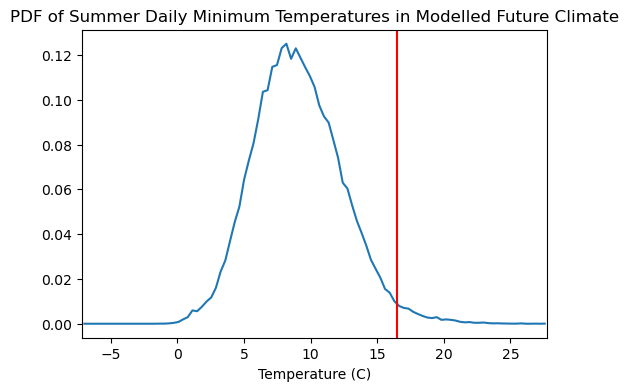

Average in future dataset: 9.07283466317937
Fraction of future with extreme value: 0.019429347826086955
Occurs once every 0.1409131593936522 years

 Shift by 4.893738876389583


<Figure size 640x480 with 0 Axes>

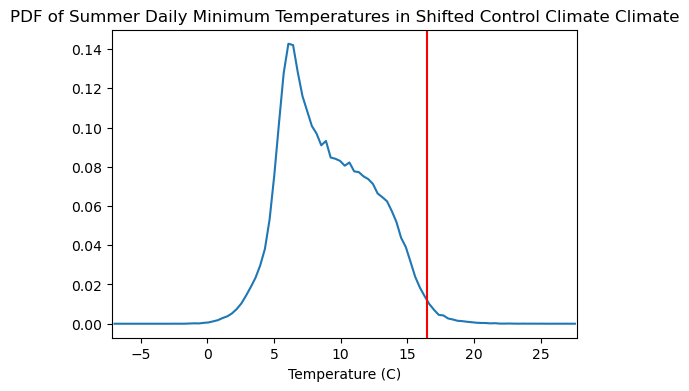

Average in shifted dataset: 9.07283466317937
Fraction of future with extreme value: 0.013485752954539961
Occurs once every 0.20301801437126338 years

 This Extreme Event is more common in the modelled future climate than shifted control climate


<Figure size 640x480 with 0 Axes>

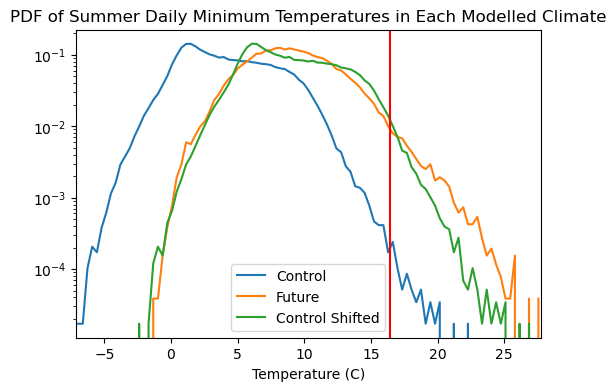

shifted extreme:  2232
shifted non-extreme:  163276
future extreme:  1430
future non-extreme:  72170
118.94445300907935
p value: 1.0770371087208713e-27
This result is statistically significant


<Figure size 640x480 with 0 Axes>

In [10]:
# Extreme High daily minimum temperatures (summer)
perform_comparison(ctrl_min_summer.TREFHTMN, rcp_min_summer.TREFHTMN, True, "Summer Daily Minimum Temperatures", "Temperature (C)")

threshold is -38.31293999178642


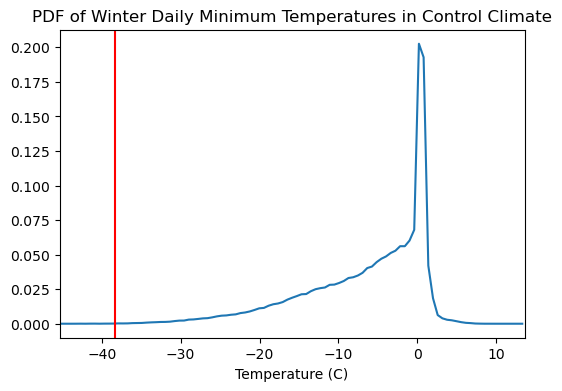

Average in control dataset: -6.252938312817672
Fraction of control with extreme value: 0.0002779339011419995
Occurs once every 9.850726290972698 years


<Figure size 640x480 with 0 Axes>

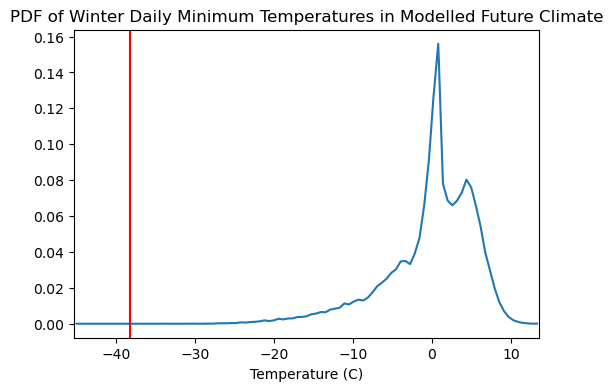

Average in future dataset: -0.06305835936629184
Fraction of future with extreme value: 0.0
Occurs once every infinity years

 Shift by 6.1898799534513795


<Figure size 640x480 with 0 Axes>

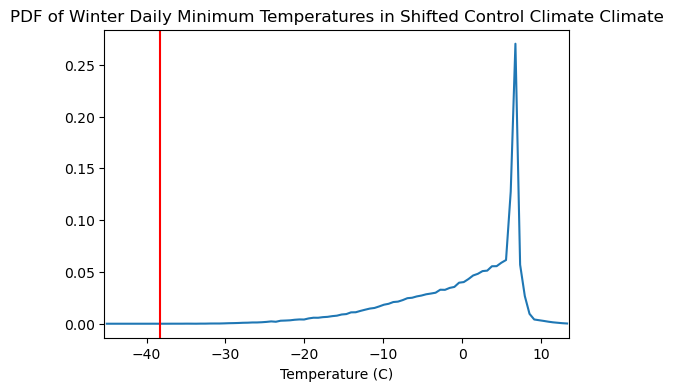

Average in shifted dataset: -0.06305835936629102
Fraction of future with extreme value: 6.176308914266656e-06
Occurs once every 443.2826830937714 years

 This Extreme Event is more common in the shifted control climate than the modelled future climate


<Figure size 640x480 with 0 Axes>

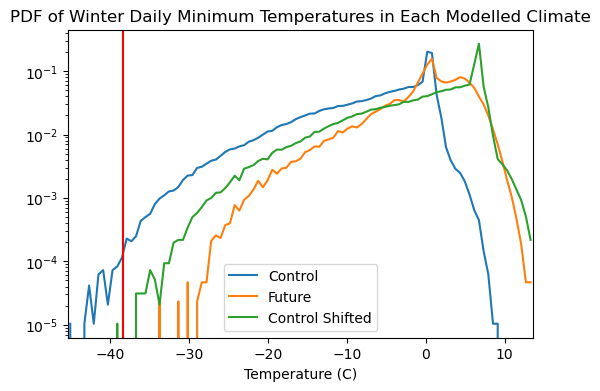

shifted extreme:  161908
shifted non-extreme:  1
future extreme:  71960
future non-extreme:  0
0.0
p value: 1.0
This result is NOT statistically significant


<Figure size 640x480 with 0 Axes>

In [11]:
# Extreme Low daily minimum temperatures (winter)
perform_comparison(ctrl_min_winter.TREFHTMN, rcp_min_winter.TREFHTMN, False, "Winter Daily Minimum Temperatures", "Temperature (C)")

threshold is 104.98387574498513


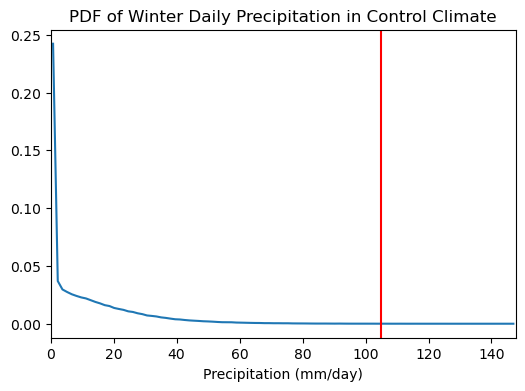

Average in control dataset: 11.511272162662108
Fraction of control with extreme value: 0.0002745478036175711
Occurs once every 9.972218867012923 years


<Figure size 640x480 with 0 Axes>

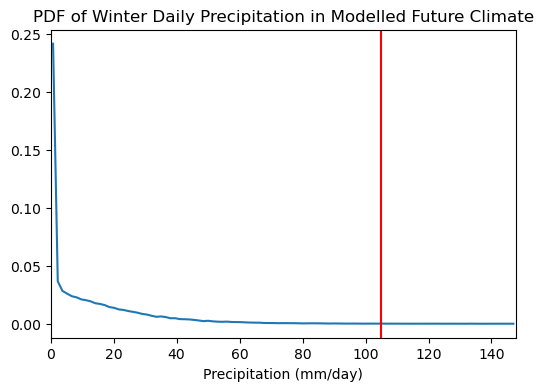

Average in future dataset: 12.482525357525054
Fraction of future with extreme value: 0.0010700389105058367
Occurs once every 2.558646008338 years

 Shift by 0.9712531948629461


<Figure size 640x480 with 0 Axes>

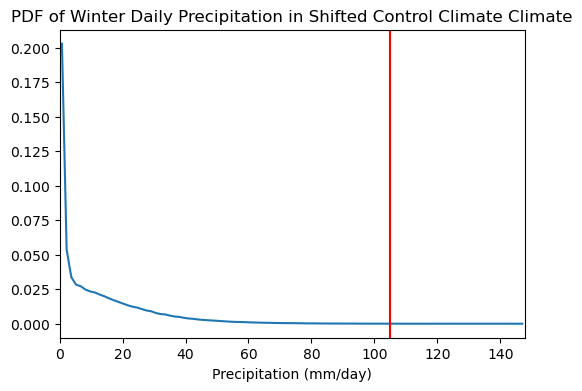

Average in shifted dataset: 12.482525357525057
Fraction of future with extreme value: 0.0003068475452196382
Occurs once every 8.922511617853669 years

 This Extreme Event is more common in the modelled future climate than shifted control climate


<Figure size 640x480 with 0 Axes>

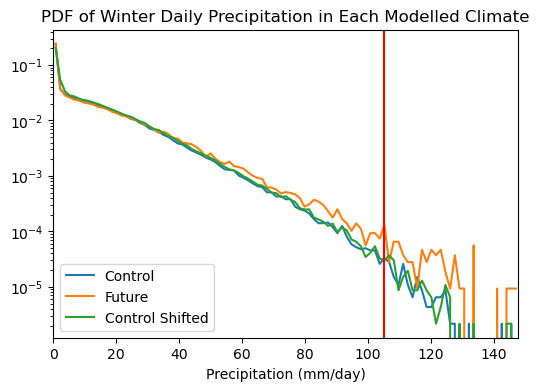

shifted extreme:  95
shifted non-extreme:  309505
future extreme:  77
future non-extreme:  71883
73.79473730888886
p value: 8.66773834811364e-18
This result is statistically significant


<Figure size 640x480 with 0 Axes>

In [12]:
# Extreme High daily precipitation (winter)
perform_comparison(ctrl_pcp_winter.PRECT, rcp_pcp_winter.PRECT, True, "Winter Daily Precipitation", "Precipitation (mm/day)")